In [2]:
import numpy as np

def merge_sort(A,k,y=0,z=None,insertion = False, insertion_level = 5):
    
    """Merge Sort! A recursive solution to sorting a list of integers.
    
    A is the list to be sorted.
    
    k is the 'degree' of the merge sort. Merge sorts splits the list into
    k subsections, each of which is divided into k subsections, etc. 
    When the length of each subsection is 0, merge sort returns the list
    and the k lists are merged together. 
    
    y and z are the start and end indixes of A which should be sorted. 
    To sort an entire list with len = 5, x should be 0 and y should be 4
    The default y is 0 and z is 1-len(A), or the user can specify y and z.
    
    If insertion is set to True, once the size of the list is less than or 
    equal to the insertion_level, insertion sort will be run instead of merge-sort.
    
    """
    if z== None:
        z= len(A)-1
    
    if insertion == False:
        # The key line of the recursion. If y!<z, the list can no longer 
        # be subdivided, so it is returned as is.
        if y<z:
            #Calls the make_ys function, which creates appropriate indexes
            # for subdividing the list into k sublists.
            y_list = make_ys(k,y,z)
            for x in xrange(k):
                if x == 0:
                    merge_sort(A,k,y_list[0],y_list[1])
                else:
                    merge_sort(A,k,y_list[x]+1,y_list[x+1])
            #Calls merge, which takes k sorted lists and merges them into
            # a sorted list.
            merge(A,k,y_list)
        return A
    
    else :
        #If insertion is set to true, once the list gets small enough
        # at or less than(insertion level), insertion sort is run on the
        # sublist.
        if z-y+1 > insertion_level:
            y_list = make_ys(k,y,z)
            for x in xrange(k):
                if x == 0:
                    merge_sort(A,k,y_list[0],y_list[1],insertion = True, insertion_level = insertion_level)
                else:
                    merge_sort(A,k,y_list[x]+1,y_list[x+1],insertion = True, insertion_level = insertion_level)
            merge(A,k,y_list)
        else:
            insertion_sort(A,y,z)
        return A


def make_ys(k,y,z):
    
    """
    Given y and z, the start and end indexes, 
    returns y_list, which is the correct indexes, 
    starting with y, to split the list into k sublists.
    """
    
    ln = z-y+1
    list_length = ln/k
    number_of_long_lists = ln%k
    long_list_counter = 0
    first_list = True
    y_list = [y]
    for x in xrange(k):
        if first_list == True and long_list_counter < number_of_long_lists:
            y_list.append(y_list[-1]+list_length)
            long_list_counter +=1
            first_list = False
        elif first_list == True:
            y_list.append(y_list[-1]+list_length-1)
            first_list = False
        elif long_list_counter < number_of_long_lists:
            long_list_counter +=1
            y_list.append(y_list[-1]+list_length+1)    
        else:
            y_list.append(y_list[-1]+list_length)    
    return y_list

def merge(A,k,y_list):
    """
    Inputs are A, the list to be sorted, k the degree of merge sort
    and y_list, the indexes of the sublists (already sorted) to be merged
    
    Outputs A with the specified subsection sorted.
    """
    
    # Sets the length of the lists, 
    # the sum of which is equal to
    # the total length
    n_list = []
    for x in xrange(k):
        if x == 0:
            n_list.append(y_list[1]-y_list[0]+1)
        else:
            n_list.append(y_list[x+1]-y_list[x])
    #Creates the merge_lists
    merge_list = []
    for n in n_list:
        merge_list.append([])
    
    #Populates merge_lists with their respective values
    for x in xrange(k):
        if n_list[x] ==0:
            pass
        else:
            if x == 0:
                for n in xrange(n_list[x]):
                    merge_list[x].append(A[y_list[x]+n])
            else:
                for n in xrange(n_list[x]):
                    merge_list[x].append(A[y_list[x]+n+1])
                    
    #add an inf term to the end of each list,
    # so when compared to other lists it is always greater
    for lis in merge_list:
        lis.append(np.inf)
        
    counter_list = []
    for x in xrange(k):
        counter_list.append(0)
        
    # goes through the merge_lists, comparing the 
    # first elements, and choosing the smallest 
    for x in range(y_list[0],y_list[-1]+1):
        target = merge_list[0][counter_list[0]]
        target_index = 0
        for a in range(1,k):            
            if merge_list[a][counter_list[a]] < target:
                target = merge_list[a][counter_list[a]]
                target_index = a
        A[x] = target
        counter_list[target_index]+=1
        
def insertion_sort(lis,y,z):
    steps = 0
    for j in range(1,z-y+1):
        key = lis[y+j]
        i= j-1
        while i>=0 and lis[y+i]>key:
            lis[y+i+1] = lis[y+i]
            i += -1
            steps +=1
        lis[y+i+1]=key 
        steps += 1
    return lis



In [3]:
"""
First I'll show that the function works in a
variety of cases and with different parameters.
"""

lis1 = [9,8,7,6,5,4,3,2,1]
lis2= [9,8,7,6,5,4,3,2,1]
lis3= [9,8,7,6,5,4,3,2,1]
lis4= [9,8,7,6,5,4,3,2,1]
lis5 = [1,2,3,4,5,6,7,8,9]
lis6= [1,1,1,1,1,1,1,1,1]
lis7 = [-4,4,-1,19,12,10979373,-1,0]
lis8 = range(100,-100,-1)

merge_sort(lis1,2)
merge_sort(lis2,3)
merge_sort(lis3,4)
merge_sort(lis4,4,3,7)
merge_sort(lis5,3)
merge_sort(lis7,3)
merge_sort(lis8,3)

print lis1
print lis2
print lis3
print lis4
print lis5
print lis6
print lis7
print lis8

"""It also works when insertion = True,
when the len of list to be sorted is less
than the specified insertion_level, 
insertion_sort is run."""


lis9 = [9,8,7,6,5,4,3,2,1]
merge_sort(lis9,3,insertion=True,insertion_level=3)
print lis9

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 2, 3, 4, 5, 6, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[-4, -1, -1, 0, 4, 12, 19, 10979373]
[-99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79

In [5]:
"""Now that we have created our functions, we
want to know how the functions compare with one 
another and with themselves with varying parameters""" 



#We first create functions that time our sorting

import time

def merge_sort_timed(A,k,y=0,z=None,insertion = False, insertion_level = 5):
    start_time = time.time()
    merge_sort(A,k,y,z=z,insertion = insertion, insertion_level = insertion_level)
    return time.time() - start_time
 

# I'll also create a timed insertion sort and a timed 2way merge sort

def insertion_sort_timed(lis):
    start_time = time.time()
    steps = 0
    for j in range(1,len(lis)):
        key = lis[j]
        i= j-1
        while i>=0 and lis[i]>key:
            lis[i+1] = lis[i]
            i += -1
            steps +=1
        lis[i+1]=key 
        steps += 1
    return time.time() - start_time

def merge_2(A,p,q,r):
    n_1 = q-p+1
    n_2 = r-q
    L = []
    R = []
    for i in range(0,n_1):
        L.append(A[p+i])     
    for j in range(0,n_2):
        R.append(A[q+j+1])
    L.append(np.inf)
    R.append (np.inf)
    i = 0
    j = 0
    for k in range(p,r+1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i +=1
        else:
            A[k] = R[j]
            j +=1
    
def merge_sort_2(A,p,r):
    if p<r:
        q = (p+r)/2
        merge_sort_2(A,p,q)
        merge_sort_2(A,q+1,r)
        merge_2(A,p,q,r)
    return A

def merge_sort_2_timed(A):
    start_time = time.time()
    init_r = len(A)-1
    init_p = 0
    merge_sort_2(A,init_p,init_r)
    return time.time() - start_time


In [8]:
# The first test we shall make is seeing
# the time it takes for
# 2 way merge sort, 3 way merge sort,
# and 3 way merge with insertion sort (insertion at n = 5)
# to run over varying lengths of list.

test_lengths = [0,1,5,10,50,100,500,1000,5000,10000]



two_way_time = []
three_way_time = []
three_way_w_insertion = []

for l in test_lengths:
    
    test = range(l,0,-1)
    runs = []
    for _ in xrange(10):
        runs.append(merge_sort_2_timed(test))
    two_way_time.append(np.mean(runs))
    
    test = range(l,0,-1)
    runs = []
    for _ in xrange(10):
        runs.append(merge_sort_timed(test,3))
    three_way_time.append(np.mean(runs))
    
    test = range(l,0,-1)
    runs = []
    for _ in xrange(10):
        runs.append(merge_sort_timed(test,3,insertion = True))
    three_way_w_insertion.append(np.mean(runs))
    
    



<function matplotlib.pyplot.show>

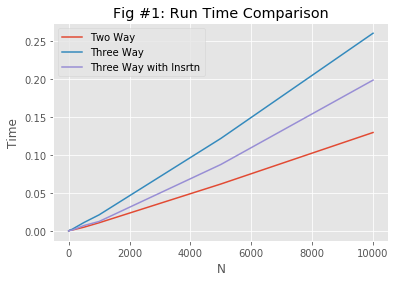

In [40]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(test_lengths,insertion_time)
plt.style.use('ggplot')
one = plt.plot(test_lengths,two_way_time, label = "Two Way")
two = plt.plot(test_lengths,three_way_time, label = "Three Way")
three = plt.plot(test_lengths,three_way_w_insertion, label = "Three Way with Insrtn")
plt.legend()
plt.ylabel("Time")
plt.xlabel("N")
plt.title("Fig #1: Run Time Comparison")
plt.show

<function matplotlib.pyplot.show>

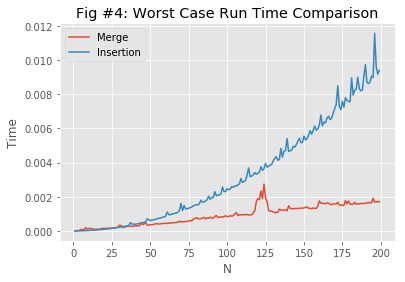

In [38]:
import copy
# The next thing that we will be testing is the
# insertion sort modifer.

# The key to this is the knowledge that insertion sort
# is faster than merge short for lists with low lenghts
# What value that is what we will test for

list_of_lists = [range(x,0,-1) for x in range(1,200)]

merge_time = []
insert_time = []
#print list_of_lists

for lis in list_of_lists:
    avg_list = []
    for x in xrange(10):
        list_copy = copy.deepcopy(lis)
        avg_list.append(merge_sort_2_timed(list_copy))
    merge_time.append(np.mean(avg_list))
    

for lis in list_of_lists:
    avg_list = []
    for x in xrange(10):
        list_copy = copy.deepcopy(lis)
        avg_list.append(insertion_sort_timed(list_copy))
    insert_time.append(np.mean(avg_list))


    

plt.style.use('ggplot')
one = plt.plot(range(1,200), merge_time,label = "Merge")
two = plt.plot(range(1,200),insert_time, label = "Insertion")
plt.legend()
plt.ylabel("Time")
plt.xlabel("N")
plt.title("Fig #4: Worst Case Run Time Comparison")
plt.show

In [39]:
# What we are interested in from the previous figure 
# is the point at which merge sort is better than
# insertion sort, as this is the cutoff value 
# that we should use when using  the insertion sort
# build for merge sort.


counter = 0
for x in xrange(200):
    if merge_time[x] < insert_time[x]:
        counter +=1
        if counter >10:
            print x-10
            break
        

30


In [28]:
#We will now compare merge sort for varying values of k

test = range(1000,0,-1)
k_times = []
for k in range(2,100):
    avg_list = []
    for x in xrange(5):
        list_copy = copy.deepcopy(test)
        avg_list.append(merge_sort_timed(list_copy,k))
    k_times.append(np.mean(avg_list))
    

<function matplotlib.pyplot.show>

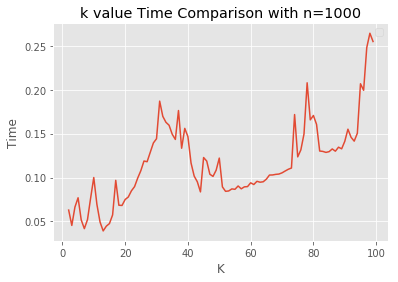

In [35]:
plt.style.use('ggplot')
one = plt.plot(range(2,100), k_times)
plt.legend()
plt.ylabel("Time")
plt.xlabel("K")
plt.title("k value Time Comparison with n=1000")
plt.show

In [31]:
k_times.index(min(k_times))

8

In [32]:
#I repeated this test with n = 2000

test = range(2000,0,-1)
k_times = []
for k in range(2,100):
    avg_list = []
    for x in xrange(5):
        list_copy = copy.deepcopy(test)
        avg_list.append(merge_sort_timed(list_copy,k))
    k_times.append(np.mean(avg_list))
    

<function matplotlib.pyplot.show>

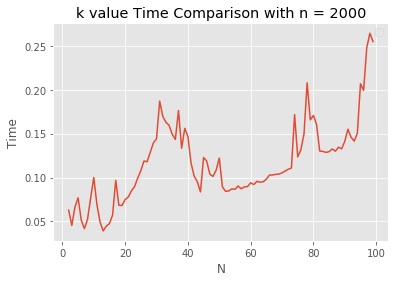

In [33]:
plt.style.use('ggplot')
one = plt.plot(range(2,100), k_times)
plt.legend()
plt.ylabel("Time")
plt.xlabel("N")
plt.title("k value Time Comparison with n = 2000")
plt.show

In [34]:
k_times.index(min(k_times))

11